<a href="https://colab.research.google.com/github/Praveengovianalytics/50DaysofRecomSystem/blob/main/Day4_Content_based_filtering_RecSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                             #50DaysofRecommendationSystems




<a id='RS'></a>
# What Is A Recommender System?

Recommender System is the name given to any software designed to recommend you objects (to purchase, to click on or  to watch) which are attractive to you with a high probability. Development of such systems became a hot topic for software developers and machine learning engineers in the last years. A well-performing recommender system can have significant boost in the profit many online platforms make.

Nowadays, many of us interact with recommender systems on a daily basis. If you have an account in Amazon or Netflix or many similar online services, you may have received suggestions that often fit your interest. This can vary from a movie suggested by Netflix or very various products suggested by Amazon. The targeted advertisements on Facebook or the targeted pop-up advertisements in your browser are also other examples of applications of recommender systems. Almost no two person recieves the exact same advertisements or suggestions on an online platform.  All these personalized suggestions and advertistments use recommender systems to find the best match for your interests according to your former ratings, purchase or clicks.

Although some of the suggestions that we receive from the existing automized recommender systems are very promising and suprisingly meet our interests, the opposite can also happen, as these systems are not perfect yet and their developments seems to have a long way ahead to improve. In this blog post I give you a brief overview about a subset of existing algorithms. I try to explain the *Matrix Factorization Collaborative Filtering algorithm* which is popular method used in many recommender systems,  step by step. I will show you how to programm this algorithm in Python and apply it on a toy problem to build a movie recommender system. Building such simple systems on your own will help us to develop some insights about how the recommender systems interact with our data, as well as letting us know about the issues and weak points of such systems.


Some of different approaches that are often used for recommender systems can be listed as following.

* Content-Based Recommender System

One of the most straight-forward approaches to find a suitable recommendation for users of a platform is the *Content-Based Recommender System* approach. This method determines a rating value $R_{ij}$ for a specific user $u_i$ giving to a sepcific object $o_j$ by using a feature vector $\vec{x}_i$ for the $i$-th user and a feature vector for the $j$-th object $\vec{\theta}_j$. We try to explain the idea of this approach in the  next section with a very small example. The biggest problem with such algorithms is that we require to know the important features which have impact on the decisions each user make. It is really difficult to find such set of features. 

Even if we can define a reasonably good set of important features, the next big challenge is to rate this features for every single item and user. Such information is often not available or not practical to extract fully. Although many platforms have access to some information about the users might be used as features like age, gender etc, often these information are not enough to build good enough feature vectors.



In [ ]:
import pandas as pd

<a id='CBRS'></a>
# Content-Based Recommender System

Let's start with a simple example for the **content-based approach**. 

Let's imagine a tiny problem where we only have three users: Samineh, Markus and Peter. If we assume that the only important features for these users (of course in a very simplified scenario) are how much a movie is (1) romantic, (2) comedy  or (3) action, then we can assume a feature vector of size 3 for each user. $\vec{x}_i=\{interest~in~romance, interest~in~comdey, interest~in~action\}$. 

We had the chance to ask all of our three users to let us know about their interests by filling their feature vectors. They could have rated each element with 0 if they don't have any interest, 1 if they really care about that feature and 0.5 if their feeling is somewhere in between. 

Samineh just likes romance movies and dislikes action and comedy a lot so her feature matrix look like: $\vec{x_s}=[1,0,0]$. Markus likes comedy movies and is not into romance and action at all $\vec{x_m}=[0,1,0]$. Peter dislikes romance but loves action and doesn't mind if there is a sense of humor in the movies so his feature vector looks like: $\vec{x_p}=[0,0.5,1]$. Stacking all these feature vectors together makes the user feature matrix.  



In [ ]:
USER=pd.DataFrame([( [1, 0, 0]), ( [0, 1, 0]), ( [0, 0.5, 1])], 
                  columns=['Ramesh','Raju','Praveen'],
                  index=['Romantic','Comedy','Action']);
print(USER)

          Ramesh  Raju  Praveen
Romantic       1   0.0        0
Comedy         0   1.0        0
Action         0   0.5        1


We have three movies in our system kadhalan, ROBO2 and 23rd_pulikesi and we want to figure out what is the best recommendation for each user. In order to do that we need to define a feature vector for each movie. We ask some expert to do that for us. kadhalan is a very romantic movie and not funny or action at all so its fair if we rate its feature vector as $\vec{\theta}_{kadhalan}=[1,0,0]$. ROBO2 is an action movie with very little essence of romance and comedy, so our movie expert filled the Terminator's feature vector as $\vec{\theta}_{ROBO2}=[0.2,0.1,1]$. The 23rd_pulikesi is a comedy movie $\vec{\theta}_{23rd_pulikesi}=[0.0,1,0.2]$. Stacking all of the movie features together will give a movie feature matrix.

In [ ]:
ITEM=pd.DataFrame([( [1, 0, 0]), ( [0.2, 0.1, 1]), ( [0, 1, 0.2])],
                  columns=['kadhalan','ROBO2','23rd_pulikesi'],
                  index=['Romantic','Comedy','Action']);
print(ITEM)

          kadhalan  ROBO2  23rd_pulikesi
Romantic       1.0    0.0            0.0
Comedy         0.2    0.1            1.0
Action         0.0    1.0            0.2


The dot product of the $i$-th user feature vector $\vec{x}_i$ and the $j$-th movie feature $\vec{x}_j$ provides a sort of similarity measure. The larger the dot product $\vec{x_i}\cdot\vec{\theta_j}=R_{ij}$ is the likelier that the user $i$ is going to like the movie $j$. We can determine all the similarity measures for each user and item simply by multiplying the user feature matrix and the movie feature matrix, as follows:

In [ ]:
ITEM.T.dot(USER)

,Ramesh,Raju,Praveen
kadhalan,1.0,0.2,0.0
ROBO2,0.0,0.6,1.0
23rd_pulikesi,0.0,1.1,0.2


So according to this simple system we can recommend kadhalan to Ramesh. To Raju we might recommend 23rd_pulikesi first and as a second choice ROBO2. Th best recommendation for Praveen (me) is the Terminator. 

I think it is already pretty clear that the main problem with the content-based recommnder systems is the missing information about the feature vectors. First of all it is  very complicated to consider all the important features explicitly. Moreover, it is almost impossible to weight all the features for all users and all items. [Matrix Factorization](#MF) tries to learn these feature matrices by using the exisitng ratings of users.  

# Day 4 

[To read more about the dataset used below](http://files.grouplens.org/datasets/movielens/ml-25m-README.html)

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip


--2020-11-12 16:19:00--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  4.54MB/s    in 0.2s    

2020-11-12 16:19:00 (4.54 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [ ]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
!pip install playsound
!pip install gtts

#Importing the required libraries
import pandas as pd 
import numpy as np
import random
from playsound import playsound
import re 
import gtts
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importing the dataset

In [ ]:
movies_dataset=pd.read_csv('ml-latest-small/movies.csv')
ratings_dataset=pd.read_csv('ml-latest-small/ratings.csv')

In [ ]:
movies_dataset.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings_dataset.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
ratings_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


# Five point Statistical Summary

In [ ]:
ratings_dataset.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


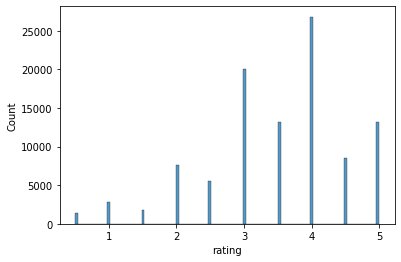

In [ ]:
sns.histplot(ratings_dataset['rating'])

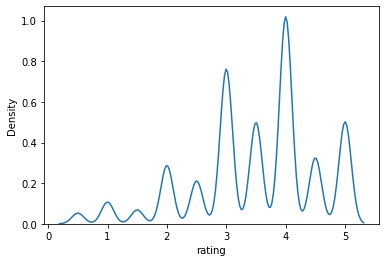

In [ ]:
sns.kdeplot(ratings_dataset['rating'])

# Observation :- 

Good to see average movie rating is 3.5 

#Converting the format of Genre column to a list and then appending to the new list

In [ ]:
#Converting the format of Genre column to a list and then appending to the new list
Genre=[]
Genres={}
for num in range(0,len(movies_dataset)):
    key=movies_dataset.iloc[num]['title']
    value=movies_dataset.iloc[num]['genres'].split('|')
    Genres[key]=value
    Genre.append(value)

In [ ]:
Genre[:5]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy']]

#Making a new column in our original Dataset    

In [ ]:
movies_dataset['new'] =Genre

#Getting the year from the movie column 

In [ ]:
p = re.compile(r"(?:\((\d{4})\))?\s*$")
years=[]
for movies in movies_dataset['title']:
     m = p.search(movies)
     year = m.group(1)
     years.append(year)  
movies_dataset['year']=years

In [ ]:
movies_dataset.head()

,movieId,title,genres,new,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1995


#Extract the movie name from the movie title 

In [ ]:
movies_dataset['movie_name'] = movies_dataset['title'].str[:-7]

In [ ]:
movies_dataset.head()

,movieId,title,genres,new,year,movie_name
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Toy Story
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]",1995,Jumanji
2,3,Grumpier Old Men (1995),Comedy|Romance,"[Comedy, Romance]",1995,Grumpier Old Men
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,"[Comedy, Drama, Romance]",1995,Waiting to Exhale
4,5,Father of the Bride Part II (1995),Comedy,[Comedy],1995,Father of the Bride Part II


#Converting the datatype of new column from list to string as required by the function

In [ ]:
movies_dataset['new'] = movies_dataset['new'].apply(' '.join)

#Applying Feature extraction - Vectorising the movie names

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfid=TfidfVectorizer(stop_words='english')

#matrix after applying the tfidf

In [ ]:
matrix=tfid.fit_transform(movies_dataset['new'])

In [ ]:
tfid.fit_transform(movies_dataset['new'])

<9742x23 sparse matrix of type '<class 'numpy.float64'>'
	with 23185 stored elements in Compressed Sparse Row format>


# Compute the cosine similarity of every genre

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
??cosine_similarity

In [ ]:
cosine_sim=cosine_similarity(matrix,matrix)


#Making a new series which have two columns in it 
#Movie name and movie id

In [ ]:
movies_dataset = movies_dataset.reset_index()
titles = movies_dataset['movie_name']
indices = pd.Series(movies_dataset.index, index=movies_dataset['movie_name'])

In [ ]:
cosine_sim

array([[1.        , 0.81357774, 0.15276924, ..., 0.        , 0.4210373 ,
        0.26758648],
       [0.81357774, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15276924, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57091541],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.4210373 , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26758648, 0.        , 0.57091541, ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
#Function to make recommendation to the user
def recommendataion(movie):
    result=[]
    #Getting the id of the movie for which the user want recommendation
    ind=indices[movie]
    #Getting all the similar cosine score for that movie
    sim_scores=list(enumerate(cosine_sim[ind]))
    #Sorting the list obtained
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)    
    #Getting all the id of the movies that are related to the movie Entered by the user
    movie_id=[i[0] for i in sim_scores]    
    #print('The Movie You Should Watched Next Are --')
    #print('ID ,   Name ,  Average Ratings , Year ')
    #Varible to print only top 10 movies
    count=0
    for id in range(0,len(movie_id)):
      #to ensure that the movie entered by the user is doesnot come in his/her recommendation
        if(ind != movie_id[id]):
            ratings=ratings_dataset[ratings_dataset['movieId']==movie_id[id]]['rating']
            avg_ratings=round(np.mean(ratings),2)
            #To print only thoese movies which have an average ratings that is more than 3.5
            if(avg_ratings >3.5):
                count+=1
                print(f'{movie_id[id]} , {titles[movie_id[id]]} ,{avg_ratings}')
                result.append([titles[movie_id[id]],str(avg_ratings)])
            if(count >=10):
                    break
    
    print('Wait!! recommendation in progress ')
    return result

In [ ]:
recommendataion('Jumanji')

53 , Indian in the Cupboard, The ,5.0
1617 , NeverEnding Story, The ,4.06
8641 , Seventh Son ,3.77
8800 , Pan ,4.5
1357 , Borrowers, The ,4.0
6163 , Shaggy Dog, The ,4.5
8638 , Night at the Museum: Secret of the Tomb ,3.7
4809 , Peter Pan ,4.17
5912 , Adventures of Sharkboy and Lavagirl 3-D, The ,4.5
2572 , Teenage Mutant Ninja Turtles III ,3.53
Wait!! recommendation in progress 


[['Indian in the Cupboard, The', '5.0'],
 ['NeverEnding Story, The', '4.06'],
 ['Seventh Son', '3.77'],
 ['Pan', '4.5'],
 ['Borrowers, The', '4.0'],
 ['Shaggy Dog, The', '4.5'],
 ['Night at the Museum: Secret of the Tomb', '3.7'],
 ['Peter Pan', '4.17'],
 ['Adventures of Sharkboy and Lavagirl 3-D, The', '4.5'],
 ['Teenage Mutant Ninja Turtles III', '3.53']]

#...... To be continued ; See you 👍😊✌🏽on Day 5 